# Homework - Random Walks (18 pts)

## Continuous random walk in three dimensions

Write a program simulating a three-dimensional random walk in a continuous space. Let 1000 independent particles all start at random positions within a cube with corners at (0,0,0) and (1,1,1). At each time step each particle will move in a random direction by a random amount between -1 and 1 along each axis (x, y, z).

1. (3 pts) Create data structure(s) to store your simulated particle positions for each of 2000 time steps and initialize them with the particles starting positions.

In [1]:
import numpy as np

numTimeSteps = 2000
numParticles = 1000

positions = np.zeros( (numParticles, 3, numTimeSteps) )

# initialize starting positions on first time step
positions[:,:,0] = np.random.random( (numParticles, 3) )

2. (3 pts) Write code to run your simulation for 2000 time steps.

In [40]:
for t in range(numTimeSteps-1):
    # 2 * [0 to 1] - 1 --> [-1 to 1]
    jumpsForAllParticles = 2 * np.random.random((numParticles, 3)) - 1
    positions[:,:,t+1] = positions[:,:,t] + jumpsForAllParticles

In [36]:
# just for fun, here's another way to run the simulation above without a loop
jumpsForAllParticlesAndAllTimeSteps = 2 * np.random.random((numParticles, 3, numTimeSteps-1)) - 1
positions[:,:,1:] = positions[:,:,0].reshape(numParticles, 3, 1) + np.cumsum(jumpsForAllParticlesAndAllTimeSteps, axis=2)

3. (3 pts) Generate a series of four 3D scatter plots at selected time points to visually convey what is going on. Arrange the plots in a single row from left to right. Make sure you indicate which time points you are showing.

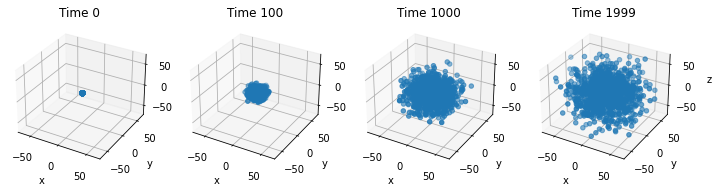

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

lim = 70
plt.figure(figsize=(12,3))
for (i,t) in enumerate([0, 100, 1000, 1999]):
    ax = plt.subplot(1, 4, i+1, projection='3d')
    x = positions[:,0,t]
    y = positions[:,1,t]
    z = positions[:,2,t]
    ax.scatter(x, y, z)
    plt.xlim([-lim, lim])
    plt.ylim([-lim, lim])
    ax.set_zlim([-lim, lim])
    plt.xlabel("x")
    plt.ylabel("y")
    ax.set_zlabel("z")
    plt.title(f"Time {t}");

4. (3 pts) Draw the path of a single particle (your choice) across all time steps in a 3D plot.

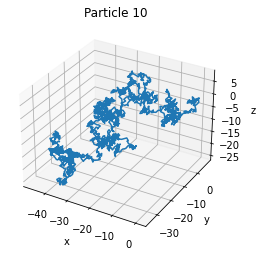

In [42]:
ax = plt.subplot(1, 1, 1, projection='3d')
i = 10  # particle index
x = positions[i,0,:]
y = positions[i,1,:]
z = positions[i,2,:]
plt.plot(x, y, z)
plt.xlabel("x")
plt.ylabel("y")
ax.set_zlabel("z")
plt.title(f"Particle {i}");

5. (3 pts) Find the minimum, maximum, mean and variance for the jump distances of all particles throughout the entire simulation. Jump distance is the euclidean distance moved on each time step $\sqrt(dx^2+dy^2+dz^2)$. *Hint: numpy makes this very simple.*

In [43]:
jumpsXYZForAllParticlesAndAllTimeSteps = positions[:,:,1:] - positions[:,:,:-1]
jumpDistancesForAllParticlesAndAllTimeSteps = np.sqrt(np.sum(jumpsXYZForAllParticlesAndAllTimeSteps**2, axis=1))

print(f"min = {jumpDistancesForAllParticlesAndAllTimeSteps.min()}")
print(f"max = {jumpDistancesForAllParticlesAndAllTimeSteps.max()}")
print(f"mean = {jumpDistancesForAllParticlesAndAllTimeSteps.mean()}")
print(f"var = {jumpDistancesForAllParticlesAndAllTimeSteps.var()}")

min = 0.0052364433932233926
max = 1.7230154410954457
mean = 0.9602742572616196
var = 0.07749699927626445


6. (3 pts) Repeat the simulation, but this time confine the particles to a unit cell of dimension 10x10x10. Make it so that if a particle leaves one edge of the cell, it enters on the opposite edge (this is the sort of thing most molecular dynamics simulations do). Show plots as in #3 to visualize the simulation (note that most interesting stuff liekly happens in the first 100 time steps).

In [44]:
for t in range(numTimeSteps-1):
    # 2 * [0 to 1] - 1 --> [-1 to 1]
    jumpsForAllParticles = 2 * np.random.random((numParticles, 3)) - 1
    positions[:,:,t+1] = positions[:,:,t] + jumpsForAllParticles
    # check for out-of-bounds and warp to opposite bound
    for i in range(numParticles):
        for j in range(3):
            if positions[i,j,t+1] < 0:
                positions[i,j,t+1] += 10
            elif positions[i,j,t+1] > 10:
                positions[i,j,t+1] -= 10

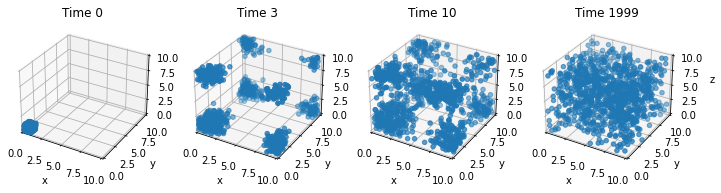

In [48]:
plt.figure(figsize=(12,3))
for (i,t) in enumerate([0, 3, 10, 1999]):
    ax = plt.subplot(1, 4, i+1, projection='3d')
    x = positions[:,0,t]
    y = positions[:,1,t]
    z = positions[:,2,t]
    ax.scatter(x, y, z)
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    ax.set_zlim([0, 10])
    plt.xlabel("x")
    plt.ylabel("y")
    ax.set_zlabel("z")
    plt.title(f"Time {t}");